b'<!doctype html><html lang="en-IN"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>new climate protocols - Google Search</title><script nonce="1JNhGOhN7BKDuj/B9Fzv7w==">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.googl
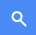

In [1]:
from PyPDF2.pdf import setRectangle
from bs4 import BeautifulSoup
import requests
import io
import PyPDF2
from googlesearch import search
query = "esg sector :pdf"
import requests
from bs4 import BeautifulSoup
from boilerpipe.extract import Extractor
from datetime import datetime
import time

# URL='https://www.beautypackaging.com/contents/view_breaking-news/2021-12-13/geka-earns-b-from-cdp-for-reducing-its-environmental-impact/'

# extractor = Extractor(extractor='ArticleExtractor', url=URL)

# print(extractor.getText())
# headers = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
header = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" ,
    'referer':'https://www.google.com/'
}
# PARAMETERS LIST https://stenevang.wordpress.com/2013/02/22/google-advanced-power-search-url-request-parameters/
params = {
    "q": """ new climate protocols """,
    "hl": "en",
    # "tbm": "nws",
    "num": 10,
    #  "tbs": "sbd:1", #Sort by Date
    "start": None,
}
page_number = 3 #change the page number from here
params["start"] = params["num"]*(page_number-1)
time.sleep(1.2)
response = requests.get("https://www.google.com/search", params=params)
soup = BeautifulSoup(response.text, 'lxml')
with open("test.html", mode="w+") as f:
    # pdf = PyPDF2.PdfFileReader(io.BytesIO(html_page.content))
    f.write(soup.prettify())
    # f.write(pdf.getPage(0))
f.close()
print(response.content)

In [2]:
# The main content of google search
main_div = soup.find("div", id="main")
# making list of all div tags
one_before_start_div = main_div.findChild("div")
one_before_start_div = one_before_start_div.find_next_siblings("div")
one_before_start_div = one_before_start_div[1]

list_of_divs = one_before_start_div.find_next_siblings("div")

# Clearing the memory
del one_before_start_div, main_div
# Making list of all the data on the google search page
all_info = []
for the_div in list_of_divs:
    link_to_post = the_div.find_next("a").attrs["href"]
    if link_to_post[0] == "/":
        link_to_post = "https://www.google.com" + link_to_post

    info_list = the_div.find_next("div").find_next("div").find_next_sibling().find_next_sibling()
    info_list = info_list.find_next("span").parent.find_all(string=True)
    
    info_list.pop(1)
    # words_date = info_list[0].split(" ")
    # if int(words_date[0]) > 4 and words_date[1] == "months": #If the news is from before 4 months it wont be saved into list
    #     continue
    # datetime_object = datetime.strptime(info_list[0], '%b %d %Y %I:%M%p')
    # print(datetime_object)
    # print(link_to_post)
    # print(info_list)
    _info = [link_to_post]
    _info.extend(info_list)
    # OPTIONAL updating the redirected URL to full URL, this is impact performance!!
    # _info[0] = requests.get(_info[0],headers=headers).url
    # appending the info into the list
    all_info.append(_info)
print(len(all_info))
all_info
# print(Extractor(extractor='ArticleExtractor', url=myurl.url).getText())


10


[['https://www.google.com/url?q=https://www.who.int/health-topics/climate-change&sa=U&ved=2ahUKEwjZq_OS7-X0AhXCppUCHdpsCmw4FBAWegQIAhAC&usg=AOvVaw0zpUsyR9BfjSQvu4I6G-At',
  '13-May-2021',
  '“The Montreal Protocol is the most successful international treaty on the environment of all time,” says Neil Harris, an atmospheric chemist\xa0...'],
 ['https://www.google.com/url?q=https://www.climateactionreserve.org/how/protocols/&sa=U&ved=2ahUKEwjZq_OS7-X0AhXCppUCHdpsCmw4FBAWegQICBAC&usg=AOvVaw3VUZVDDhUlywy4MyhVXfqd',
  '13-May-2021',
  '“The Montreal Protocol is the most successful international treaty on the environment of all time,” says Neil Harris, an atmospheric chemist\xa0...'],
 ['https://www.google.com/url?q=https://science.thewire.in/environment/as-nations-announce-new-climate-goals-what-lies-in-the-montreal-protocols-future/&sa=U&ved=2ahUKEwjZq_OS7-X0AhXCppUCHdpsCmw4FBAWegQICRAC&usg=AOvVaw1XyF_-qlAv4WSWWotTZLz3',
  '13-May-2021',
  '“The Montreal Protocol is the most successful inte